#  Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through a machine learning project with the goal of predicting the sale price of bulldozers with RandomForestRegressor.

## 1. Problem defition

How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data 

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 We make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

In [42]:
# All necessary importings.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import make_scorer

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

In [45]:
# Exploring train data.

data_train = pd.read_csv("data/Train.csv",low_memory=False)

# Let's save shape and columns' names of pure training data for later use.
pure_training_shape = data_train.shape
pute_training_columns = data_train.columns

print(f"data_train shape: {data_train.shape}")
data_train.head(3).T

data_train shape: (401125, 53)


,0,1,2
SalesID,1139246,1139248,1139249
SalePrice,66000,57000,10000
MachineID,999089,117657,434808
ModelID,3157,77,7009
datasource,121,121,121
auctioneerID,3.0,3.0,3.0
YearMade,2004,1996,2001
MachineHoursCurrentMeter,68.0,4640.0,2838.0
UsageBand,Low,Low,High
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00


In [46]:
# Exploring train data.
data_train.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension     

In [47]:
# Exploring train data.
data_train.dtypes

SalesID                       int64
SalePrice                     int64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                

## Getting Data Ready 

Since I realized date data was taken as object it requires reimporting as datetimeobject.

In [48]:
data_train = pd.read_csv("data/Train.csv",low_memory=False,parse_dates=["saledate"])
data_train.dtypes

SalesID                              int64
SalePrice                            int64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

In [49]:
# Observing number of NaN data.

NaN_numeric = 0
NaN_not_numeric = 0

for label,content in data_train.items():
    if pd.isnull(content).sum() and pd.api.types.is_numeric_dtype(content):
        NaN_numeric+=1
    elif pd.isnull(content).sum() and (not pd.api.types.is_numeric_dtype(content)):
        NaN_not_numeric+=1

print(f"NaN numeric: {NaN_numeric} and NaN not numeric: {NaN_not_numeric}")        

NaN numeric: 2 and NaN not numeric: 38


In [50]:
# NaN values as percentage.
data_train.isna().sum()/len(data_train)*100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 5.019882
YearMade                     0.000000
MachineHoursCurrentMeter    64.408850
UsageBand                   82.639078
saledate                     0.000000
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.201558
fiModelSeries               85.812901
fiModelDescriptor           82.070676
ProductSize                 52.545964
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                73.982923
Enclosure                    0.081022
Forks                       52.115425
Pad_Type                    80.271985
Ride_Control                62.952696
Stick                       80.271985
Transmission

In [51]:
# Defining a function to handle NaN numeric data for later usage.

def fill_missing_numeric(data_set):

    for label,content in data_set.items():
        
        if pd.api.types.is_numeric_dtype(content) and pd.isna(content).sum():
            
            # Creating a new column to holding info about if cells were NaN or not.
            data_set[label + "_is_missing"] = pd.isna(content)
            # Filling missing values with median of given dataset.
            data_set[label] = content.fillna(value = content.median())

In [52]:
fill_missing_numeric(data_train)

In [53]:
# Checking for NaN numerics

for label,content in data_train.items():        
    if pd.api.types.is_numeric_dtype(content) and pd.isna(content).sum():
        print(label)

Prints nothing which means there is not NaN numeric anymore.

In [54]:
# Observing for other NaN data.

for label,content in data_train.items():        
    if (not pd.api.types.is_numeric_dtype(content)) and pd.isna(content).sum():
        print(f"{label}: {data_train[label].dtype}")
    
# Saledate column has no NaN row so remaining NaN values are object dtype. We are going to categorize object type data
# to use coding system.

UsageBand: object
fiSecondaryDesc: object
fiModelSeries: object
fiModelDescriptor: object
ProductSize: object
Drive_System: object
Enclosure: object
Forks: object
Pad_Type: object
Ride_Control: object
Stick: object
Transmission: object
Turbocharged: object
Blade_Extension: object
Blade_Width: object
Enclosure_Type: object
Engine_Horsepower: object
Hydraulics: object
Pushblock: object
Ripper: object
Scarifier: object
Tip_Control: object
Tire_Size: object
Coupler: object
Coupler_System: object
Grouser_Tracks: object
Hydraulics_Flow: object
Track_Type: object
Undercarriage_Pad_Width: object
Stick_Length: object
Thumb: object
Pattern_Changer: object
Grouser_Type: object
Backhoe_Mounting: object
Blade_Type: object
Travel_Controls: object
Differential_Type: object
Steering_Controls: object


In [55]:
# Defining a function to handle categorization.

def convert_to_cat(data_set):
    
    for label,content in data_set.items():
        if pd.api.types.is_object_dtype(content):
            data_set[label] = data_set[label].astype('category')

In [56]:
convert_to_cat(data_train)

In [57]:
# 1. Step: Converting all objects to categorical dtype.

for label,content in data_train.items():        
    if (not pd.api.types.is_numeric_dtype(content)) and pd.isna(content).sum():
        print(f"{label}: {data_train[label].dtype}")

UsageBand: category
fiSecondaryDesc: category
fiModelSeries: category
fiModelDescriptor: category
ProductSize: category
Drive_System: category
Enclosure: category
Forks: category
Pad_Type: category
Ride_Control: category
Stick: category
Transmission: category
Turbocharged: category
Blade_Extension: category
Blade_Width: category
Enclosure_Type: category
Engine_Horsepower: category
Hydraulics: category
Pushblock: category
Ripper: category
Scarifier: category
Tip_Control: category
Tire_Size: category
Coupler: category
Coupler_System: category
Grouser_Tracks: category
Hydraulics_Flow: category
Track_Type: category
Undercarriage_Pad_Width: category
Stick_Length: category
Thumb: category
Pattern_Changer: category
Grouser_Type: category
Backhoe_Mounting: category
Blade_Type: category
Travel_Controls: category
Differential_Type: category
Steering_Controls: category


In [58]:
# 2.Step: Converting all categorical dtypes to int in dataframe.
# Defining a function to handle.

def cat_to_int(data_set):
    
    for label,content in data_set.items():
        if pd.api.types.is_categorical_dtype(content):
            
            # Creating a new column to holding info about if cells were NaN or not.
            data_set[label + "_is_missing"] = pd.isna(content)
            # Add 1, NaN values would be zero.
            data_set[label] = pd.Categorical(data_set["UsageBand"]).codes + 1

In [59]:
cat_to_int(data_train)

In [60]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 99 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   SalesID                              401125 non-null  int64         
 1   SalePrice                            401125 non-null  int64         
 2   MachineID                            401125 non-null  int64         
 3   ModelID                              401125 non-null  int64         
 4   datasource                           401125 non-null  int64         
 5   auctioneerID                         401125 non-null  float64       
 6   YearMade                             401125 non-null  int64         
 7   MachineHoursCurrentMeter             401125 non-null  float64       
 8   UsageBand                            401125 non-null  int8          
 9   saledate                             401125 non-null  datetime64[ns]
 

In [61]:
# Conversion from cat to int is succesfull
data_train.head(5).T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,True
Blade_Type_is_missing,True,True,True,True,True
Travel_Controls_is_missing,True,True,True,True,True
Differential_Type_is_missing,False,False,True,True,True


In [62]:
# To take advantage of saledate data, we are going to split it into days, months, and years.
# Defining a function to handle

def split_years(data_set):
    # 1. Step: Sort by date
    data_set.sort_values(by=["saledate"], axis=0,ascending=True,inplace=True)
    # 2. Step: Split data properly
    data_set["Years"] = data_set["saledate"].dt.year
    data_set["Months"] = data_set["saledate"].dt.month
    data_set["Days"] = data_set["saledate"].dt.day
    data_set.drop(["saledate"], axis=1, inplace=True)

In [63]:
split_years(data_train)
data_train.Years.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: Years, dtype: int64

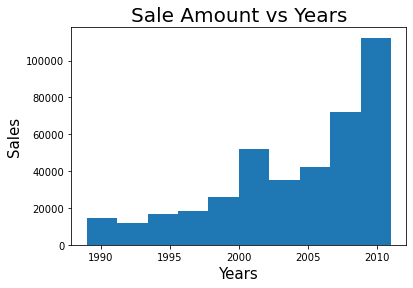

In [64]:
plt.hist(data_train.Years)

dic1 = {'fontsize': 20, 'fontweight' : 20,'verticalalignment': 'baseline'}
plt.title("Sale Amount vs Years", fontdict = dic1)

dic2 = {'fontsize': 15, 'fontweight' : 12}
plt.xlabel("Years",fontdict=dic2)
plt.ylabel("Sales",fontdict=dic2)

plt.show();

### Checking Data for Modelling 

In [65]:
# Data for training is NaN free
data_train.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Years                           0
Months                          0
Days                            0
Length: 101, dtype: int64

In [67]:
# Data for training is full of numeric values, which means ready for modelling.
data_train.dtypes.value_counts()

bool       46
int8       44
int64       9
float64     2
dtype: int64

## Preprocessing Data for Validation 

Before testing, we have to preprocess data_validation in same way with data_training.

In [68]:
data_validation = pd.read_csv("data/Valid.csv",low_memory=False,parse_dates=["saledate"])
print(f"valid shape: {data_validation.shape}")
print(f"pure training shape: {pure_training_shape} ")

valid shape: (11573, 52)
pure training shape: (401125, 53) 


SalesPrice of validation set has been provided separately. We are going to concatenate them.

In [69]:
data_valid_prices = pd.read_csv("data/ValidSolution.csv")
data_validation["SalePrices"] = data_valid_prices["SalePrice"]

# Since there is no NaN in validation set (thanks to that adjustment, they are going to have same number of columns)
data_validation["auctioneerID_is_missing "] = False

data_validation.shape

(11573, 54)

Now we are ready to perform all preprocessing on data_validation.

In [70]:
fill_missing_numeric(data_validation)
convert_to_cat(data_validation)
cat_to_int(data_validation)
split_years(data_validation)

In [71]:
print(data_validation.shape,data_train.shape)

(11573, 101) (401125, 101)


## Splitting Data 

In [72]:
X_train = data_train.drop("SalePrice",axis=1)
y_train = data_train["SalePrice"]
X_validation = data_validation.drop("SalePrices",axis=1)
y_validation = data_validation["SalePrices"]

### Now two data sets are ready for modelling and scoring! 

In [73]:
# Defining a function to determine error score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

## Creating a model

### Trying to find best hyperparameters 

#### RandomForestRegressor 

Since the code below demands lots of cpu performance, we have ran code below on Google Colab and best params has been set.

#### Model with Best Params

In [74]:
model = RandomForestRegressor(n_estimators= 90,
                             min_samples_split= 16,
                             min_samples_leaf= 11,
                             max_samples= 10000,
                             max_features= 'auto',
                             max_depth= 10,
                             n_jobs=1)
model.fit(X_train,y_train)
rmsle(y_validation,model.predict(X_validation))

0.3996060685005338

### We succeded to improve a model to predict price with root mean squared log error: 0.3996060685005338 !!!

## Feature Importance

Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (SalePrice).

In [75]:
model.feature_importances_

array([2.97738957e-02, 1.79437967e-02, 1.97770875e-01, 1.93281157e-04,
       1.88798561e-03, 2.84500151e-01, 3.74161605e-03, 2.08328890e-05,
       2.08655947e-05, 1.63220705e-05, 2.83063810e-05, 9.73327266e-06,
       7.32087129e-06, 3.26178600e-05, 1.80770317e-05, 1.16190753e-05,
       5.74245925e-08, 1.95443264e-05, 1.15050087e-05, 2.64523308e-05,
       2.80819324e-05, 8.29971953e-06, 1.78786138e-07, 1.88032463e-05,
       1.91387895e-05, 4.83256442e-06, 5.78992781e-08, 2.07668531e-05,
       4.21597044e-05, 9.01468969e-06, 7.39218660e-06, 2.14735882e-05,
       9.60035012e-06, 3.90787000e-05, 5.66024584e-06, 0.00000000e+00,
       6.41851884e-06, 2.22335241e-05, 1.45960953e-05, 1.49267090e-05,
       2.67971834e-05, 2.60840184e-05, 1.04372764e-05, 6.84642561e-06,
       5.96392553e-05, 1.40123962e-07, 5.05226985e-06, 0.00000000e+00,
       1.20707235e-07, 2.51545464e-05, 1.03405090e-05, 3.72683897e-05,
       7.06866060e-04, 2.49897981e-05, 0.00000000e+00, 0.00000000e+00,
      

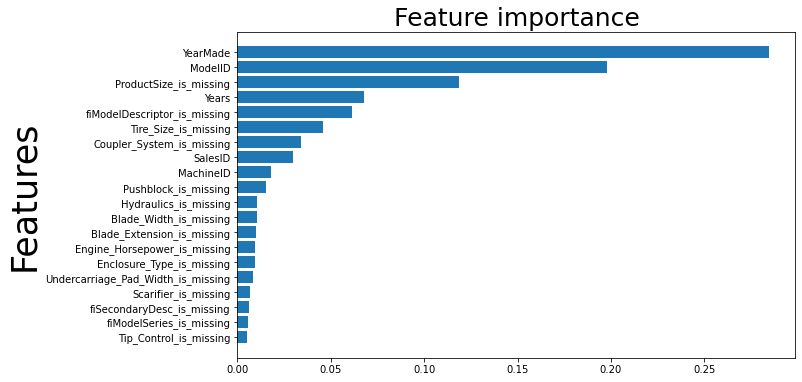

In [76]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots(figsize=(10,6))
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features",fontsize=35)
    ax.set_title("Feature importance",fontsize=25)
    ax.invert_yaxis()
    
plot_features(X_train.columns,model.feature_importances_)